In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
print(f'Tensorflow: {tf.__version__}\nKeras: {keras.__version__}')

Tensorflow: 2.18.0
Keras: 3.8.0


In [3]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [4]:
!pip install wget

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=eacac9162670c067592b35cb0abb0beac22981a05b62cb0757dffdaeb7c9b2db
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [32]:
data = './traffic-signs-data/'

train_link = data + 'train.p'

valid_link = data + 'valid.p'

test_link = data + 'test.p'

In [33]:
import wget

wget.download(link)
!unzip -q traffic-signs-data.zip -d $data

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
import pickle

with open(train_link , mode = 'rb') as f:
 train = pickle.load(f)
with open(valid_link , mode = 'rb') as f:
 valid = pickle.load(f)
with open(test_link , mode = 'rb') as f:
 test = pickle.load(f)

In [35]:
x_train = train['features']
y_train = train['labels']

x_valid = valid['features']
y_valid = valid['labels']

x_test = test['features']
y_test = test['labels']

x_train.shape , x_valid.shape , x_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [36]:
class_name = {0: 'Speed limit (20km/h)',

 1: 'Speed limit (30km/h)',

 2: 'Speed limit (50km/h)',

 3: 'Speed limit (60km/h)',

 4: 'Speed limit (70km/h)',

 5: 'Speed limit (80km/h)',

 6: 'End of speed limit (80km/h)',

 7: 'Speed limit (100km/h)',

 8: 'Speed limit (120km/h)',

 9: 'No passing',

 10: 'No passing for vehicles over 3.5 metric tons',

 11: 'Right-of-way at the next intersection',

 12: 'Priority road',

 13: 'Yield',

 14: 'Stop',

 15: 'No vehicles',

 16: 'Vehicles over 3.5 metric tons prohibited',

 17: 'No entry',

 18: 'General caution',

 19: 'Dangerous curve to the left',

 20: 'Dangerous curve to the right',

 21: 'Double curve',

 22: 'Bumpy road',

 23: 'Slippery road',

 24: 'Road narrows on the right',

 25: 'Road work',

 26: 'Traffic signals',

 27: 'Pedestrians',

 28: 'Children crossing',

 29: 'Bicycles crossing',

 30: 'Beware of ice/snow',

 31: 'Wild animals crossing',

 32: 'End of all speed and passing limits',

 33: 'Turn right ahead',

 34: 'Turn left ahead',

 35: 'Ahead only',

 36: 'Go straight or right',

 37: 'Go straight or left',

 38: 'Keep right',

 39: 'Keep left',

 40: 'Roundabout mandatory',

 41: 'End of no passing',

 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [37]:
def plot_data (x_data , y_data):
  fig ,ax = plt.subplots(2,4)
  count = 0
  for i in range(0,2):
    for j in range(0,4):
        ax[i,j].imshow(x_data[count])
        ax[i,j].set_xlabel(class_name[y_data[count]] , fontsize = 7)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        count+=1

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

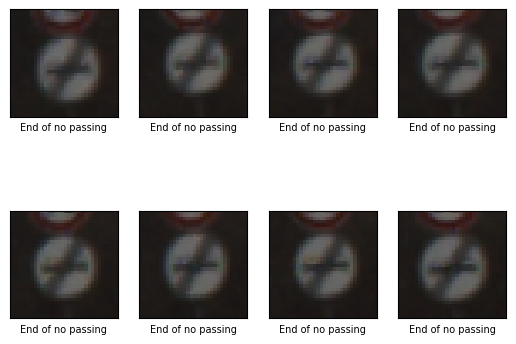

In [38]:
plot_data(x_train,y_train)

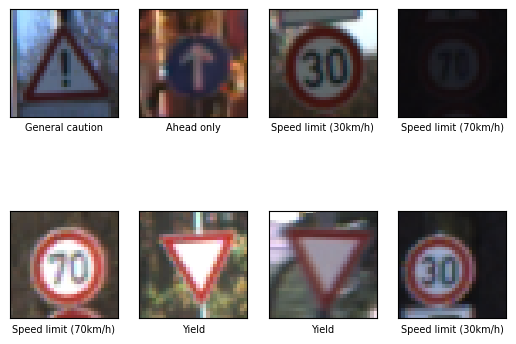

In [39]:
from sklearn.utils import shuffle

x_train,y_train = shuffle(x_train,y_train)
plot_data(x_train,y_train)

In [40]:
x_train = x_train.astype('float32') / 255

x_valid = x_valid.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [41]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train , len(class_name))
y_valid_onehot = to_categorical(y_valid , len(class_name))
y_test_onehot = to_categorical(y_test , len(class_name))

In [42]:
from keras import layers

input_shape = [32,32,3]

model = keras.models.Sequential([
    layers.Conv2D(32,(3,3) , padding = 'same' , input_shape = input_shape),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.2),
    layers.Dense(43),
    layers.Activation('softmax')
])

model.summary()

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range = 0.18,
                         zoom_range = 0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip = False,
                         fill_mode = 'nearest'
                        )

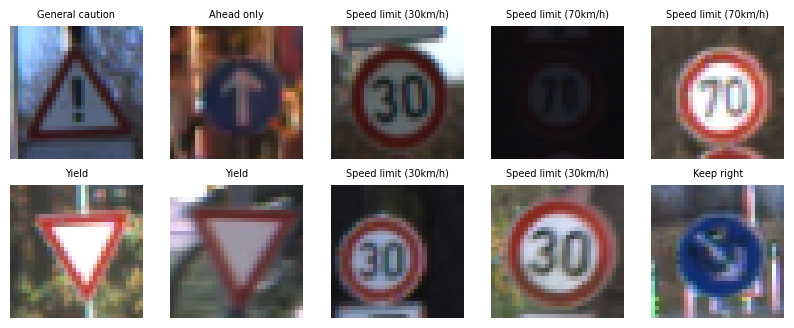

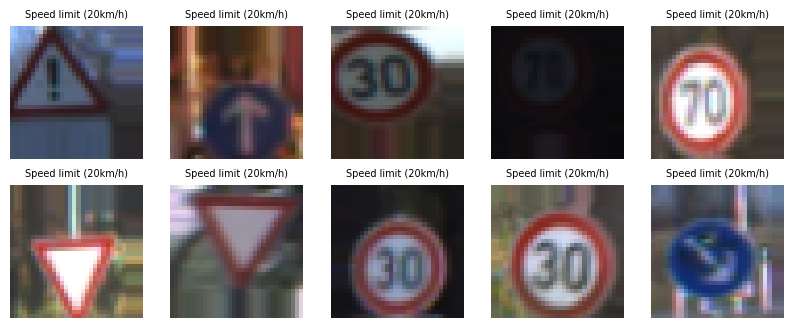

In [44]:
data_x_train = aug.flow(x_train , y_train_onehot , batch_size = 10 , shuffle = False)

plt.figure(figsize=(10, 10))
for i in range(10): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_name[y_train[i]] , fontsize = 7)
    plt.axis('off') 
plt.show()

print('\n')

x_batch, y_batch = next(data_x_train)

plt.figure(figsize=(10, 10))
for i in range(10): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(class_name[y_batch[i][0]] , fontsize = 7)
    plt.axis('off') 
plt.show()

In [45]:
learning_rate = 0.01

model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
)

In [46]:
batch_size = 128
epochs = 50
factor = 0.2

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = factor, patience = 3, min_lr=1e-6)

history = model.fit(
    aug.flow(x_train, y_train_onehot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_onehot),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs = epochs,
    callbacks = [early_stopping , reduce_lr]
)

Epoch 1/50


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


271/271 ━━━━━━━━━━━━━━━━━━━━ 57s 196ms/step - accuracy: 0.2506 - loss: 3.0131 - val_accuracy: 0.3145 - val_loss: 2.8581 - learning_rate: 0.0100
Epoch 2/50
  1/271 ━━━━━━━━━━━━━━━━━━━━ 50s 186ms/step - accuracy: 0.6719 - loss: 1.1777

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6719 - loss: 1.1777 - val_accuracy: 0.2968 - val_loss: 2.8654 - learning_rate: 0.0100
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 50s 184ms/step - accuracy: 0.7547 - loss: 0.7540 - val_accuracy: 0.6712 - val_loss: 1.2082 - learning_rate: 0.0100
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8594 - loss: 0.5060 - val_accuracy: 0.6907 - val_loss: 1.1109 - learning_rate: 0.0100
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 48s 176ms/step - accuracy: 0.9361 - loss: 0.1971 - val_accuracy: 0.8295 - val_loss: 0.6836 - learning_rate: 0.0100
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9609 - loss: 0.0826 - val_accuracy: 0.8329 - val_loss: 0.6804 - learning_rate: 0.0100
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 51s 186ms/step - accuracy: 0.9679 - loss: 0.1014 - val_accuracy: 0.8501 - val_loss: 0.6783 - learning_rate: 0.0100
Epoch 8/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9453 - loss: 0.1353 - va

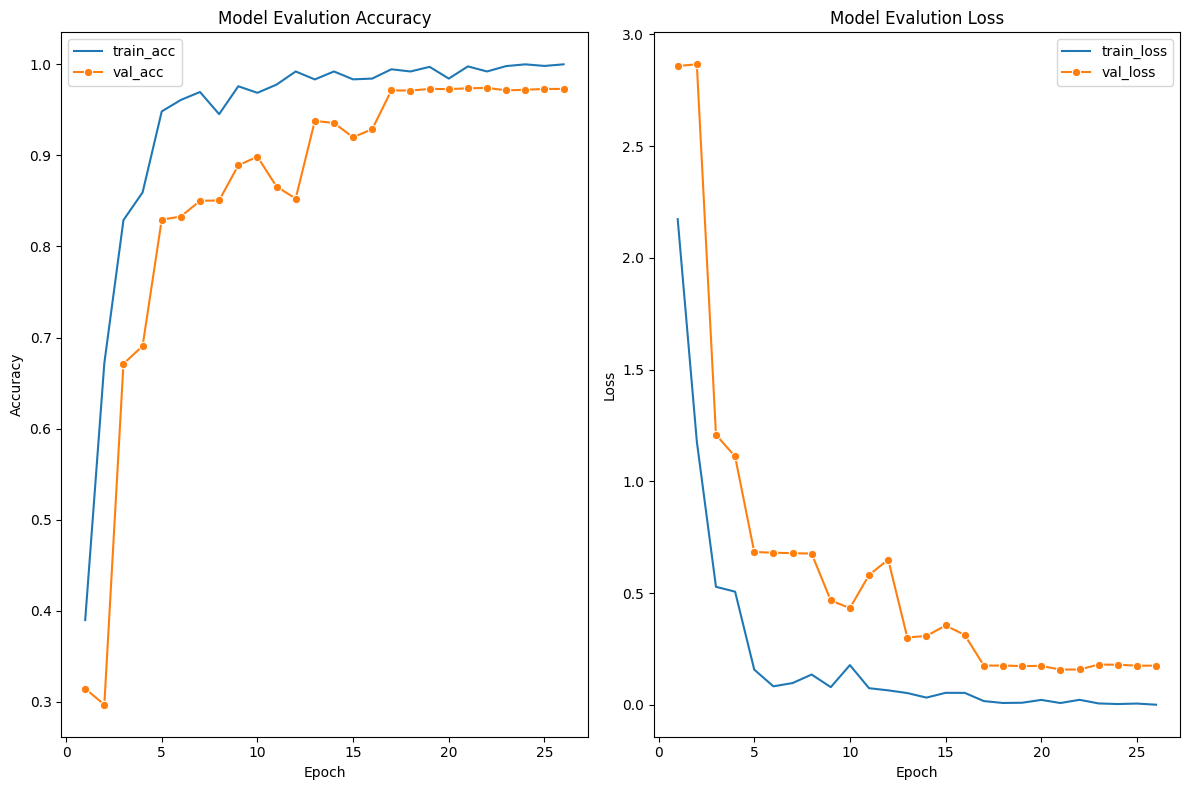

In [47]:
evalution = history.history

train_accuracy = evalution['accuracy']
val_accuracy = evalution['val_accuracy']
train_loss = evalution['loss']
val_loss = evalution['val_loss']

fig ,ax = plt.subplots(1,2 , figsize=(12,8))
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_accuracy , label = 'train_acc' , ax = ax[0])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_accuracy , label = 'val_acc' , marker = 'o' , ax = ax[0])

sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_loss , label = 'train_loss' , ax = ax[1])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_loss , label = 'val_loss' , marker = 'o' , ax = ax[1])

ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Evalution Loss')

ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Evalution Accuracy')
plt.tight_layout()

In [48]:
model.evaluate(x_test,y_test_onehot)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9541 - loss: 0.2356


[0.2463485151529312, 0.9531275033950806]

In [49]:
y_pred_model = model.predict(x_test)
y_pred_model = np.argmax(y_pred_model , axis = -1)



395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [50]:
from tensorflow import keras

# saved_model = keras.models.load_model('../input/vgg_traffic_sign/keras/default/1/vgg_traffic_sign_95.keras')


y_pred_model = model.predict(x_test)
y_pred_model = np.argmax(y_pred_model , axis = -1)



395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

a = accuracy_score(y_test,y_pred_model)
p = precision_score(y_test,y_pred_model , average='weighted')
r = recall_score(y_test,y_pred_model , average='weighted')



data = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'CNN': [a, p, r],
  
}
df = pd.DataFrame(data)
df

,Metric,CNN
0,Accuracy,0.953127
1,Precision,0.957033
2,Recall,0.953127


In [52]:
from sklearn.metrics import classification_report

report_model = classification_report(y_test,y_pred_model , target_names = class_name.values())
report_model_dict = classification_report(y_test,y_pred_model , target_names = class_name.values() , output_dict=True)



print(report_model)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.98      1.00      0.99        60
                              Speed limit (30km/h)       0.92      1.00      0.96       720
                              Speed limit (50km/h)       0.95      0.98      0.97       750
                              Speed limit (60km/h)       0.98      0.97      0.98       450
                              Speed limit (70km/h)       0.99      0.95      0.97       660
                              Speed limit (80km/h)       0.91      0.95      0.93       630
                       End of speed limit (80km/h)       0.99      0.98      0.99       150
                             Speed limit (100km/h)       0.98      0.98      0.98       450
                             Speed limit (120km/h)       0.98      0.94      0.96       450
                                        No passing       0.99      0.99      0.

In [53]:
df = pd.DataFrame(report_model_dict).T
df = df.sort_values(by='f1-score')

df.head(5)

,precision,recall,f1-score,support
Beware of ice/snow,0.850000,0.680000,0.755556,150.0
Double curve,0.909091,0.666667,0.769231,90.0
Roundabout mandatory,0.644444,0.966667,0.773333,90.0
Dangerous curve to the left,0.659341,1.000000,0.794702,60.0
Pedestrians,0.934783,0.716667,0.811321,60.0


In [54]:
class_name

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

<Axes: >

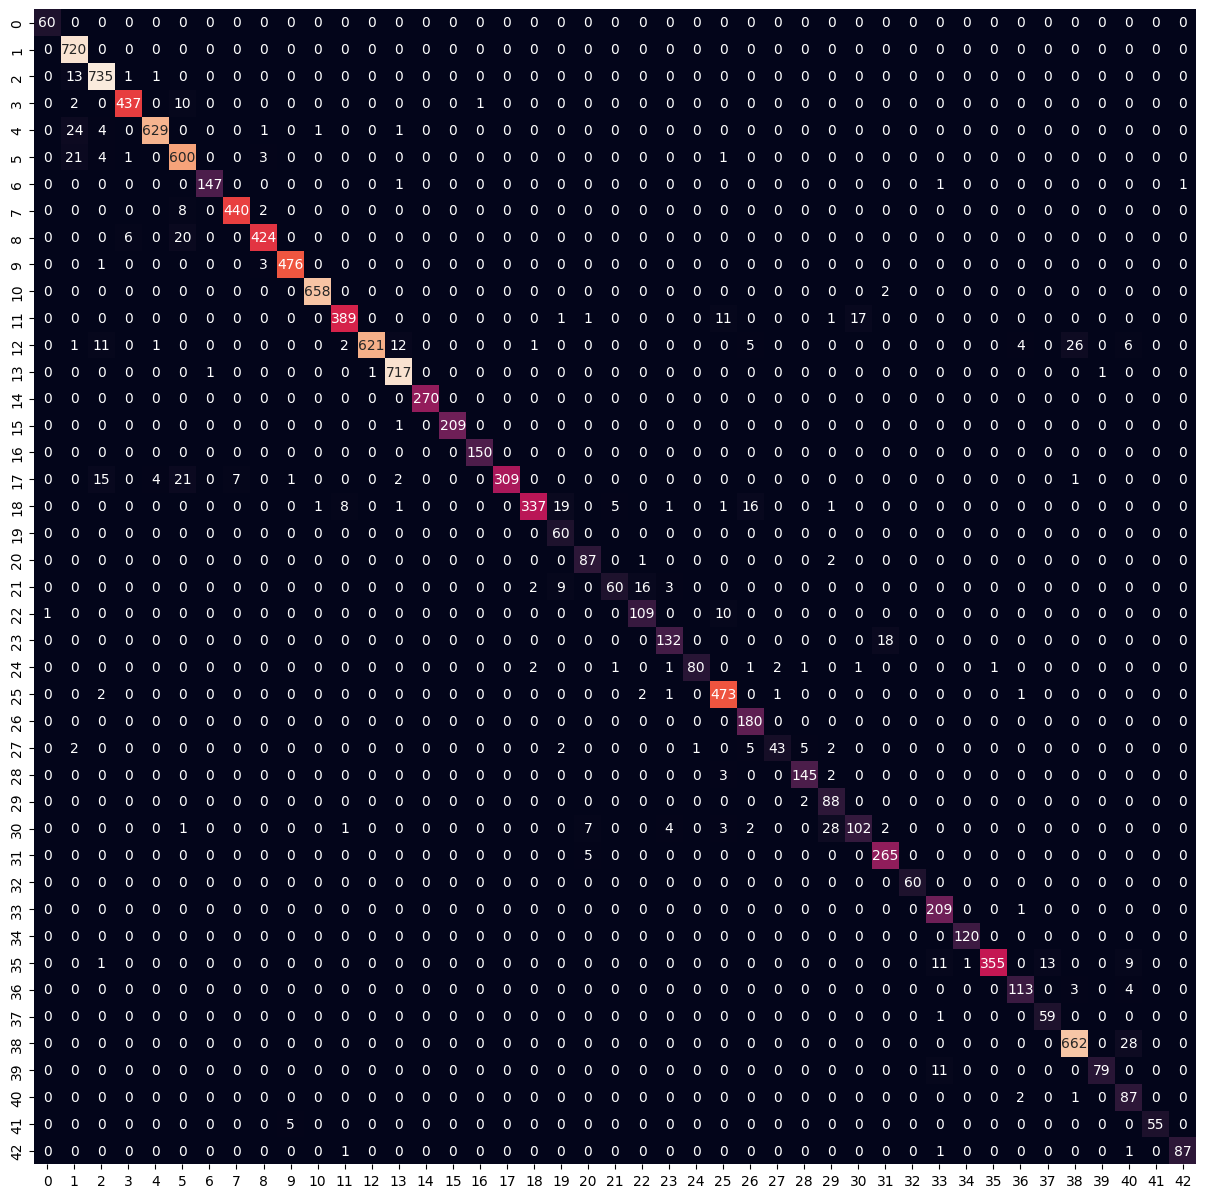

In [55]:
from sklearn.metrics import confusion_matrix

conf_model = confusion_matrix(y_test,y_pred_model)


plt.figure(figsize=(15,15))
sns.heatmap(conf_model , annot = True , fmt = '.0f' , cbar = False)

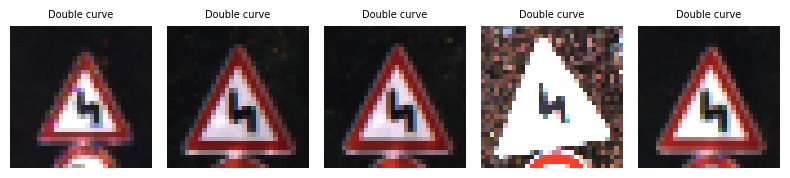

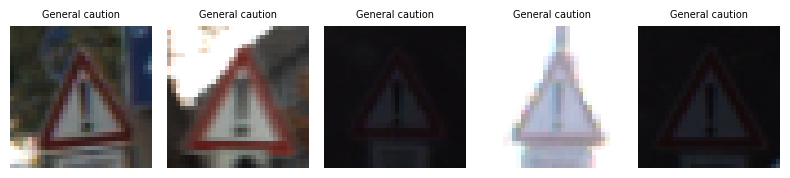

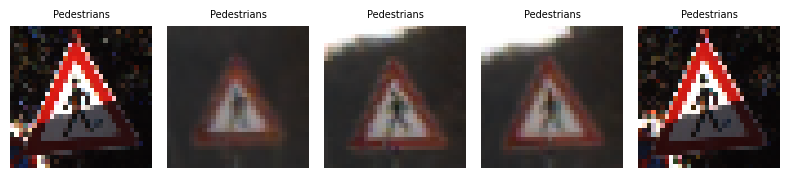

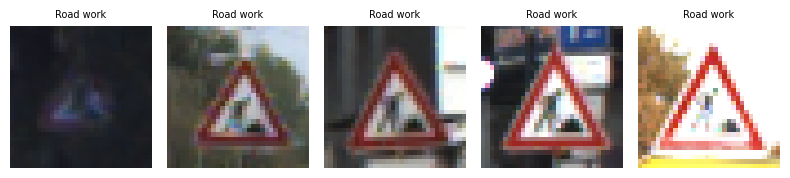

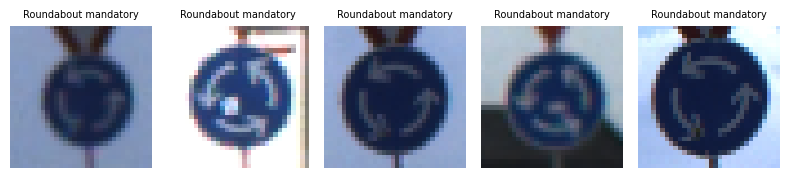

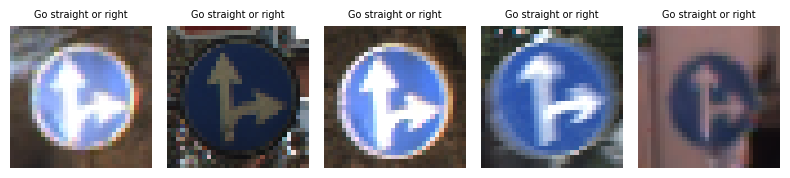

In [56]:
def display_random_images(class_index, x_data, y_data):
    class_indices = np.where(y_data == class_index)[0]
    if len(class_indices) == 0:
        print(f'Not in class')
        return

    random_indices = np.random.choice(class_indices, size=min(5, len(class_indices)), replace=False)
    nrows, ncols = 1, 5
    plt.figure(figsize=(8,6))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(x_data[idx]) 
        plt.axis('off')
        plt.title(f'{class_name[class_index]}' , fontsize = 7)
    
    plt.tight_layout()
    plt.show()

display_random_images(class_index=21, x_data=x_test, y_data=y_test)
display_random_images(class_index=18, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=27, x_data=x_test, y_data=y_test)
display_random_images(class_index=25, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=40, x_data=x_test, y_data=y_test)
display_random_images(class_index=36, x_data=x_test, y_data=y_test)

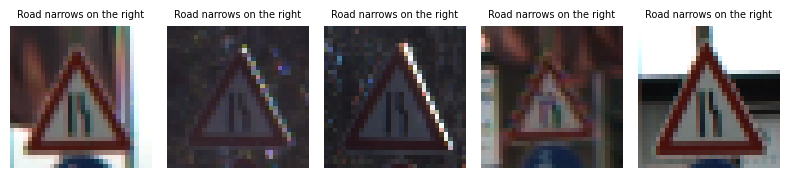

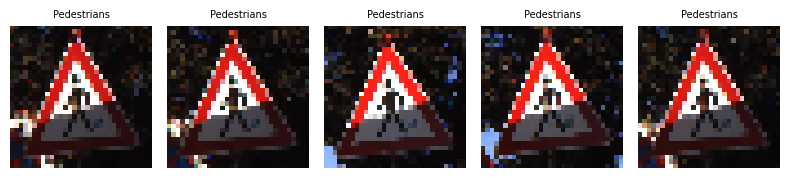

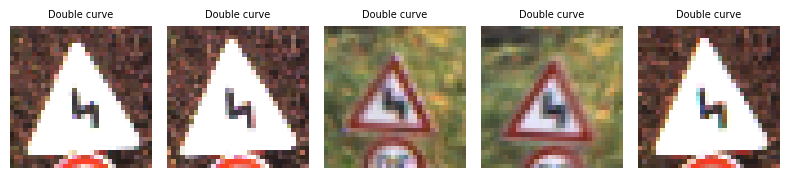

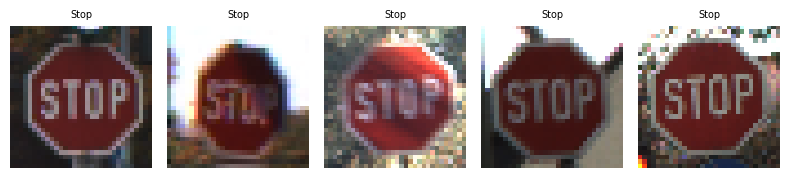

In [58]:
display_random_images(class_index=24, x_data=x_test, y_data=y_test)
display_random_images(class_index=27, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=21, x_data=x_test, y_data=y_test)
display_random_images(class_index=14, x_data=x_test, y_data=y_test)

In [59]:
conv_layers = {}

for index, layer in enumerate(model.layers):
    if isinstance(layer, (keras.layers.Flatten, keras.layers.Dense)):
        break
    else: 
        conv_layers[index] = layer.name
conv_layers

{0: 'conv2d_4',
 1: 'activation_6',
 2: 'batch_normalization_5',
 3: 'conv2d_5',
 4: 'activation_7',
 5: 'batch_normalization_6',
 6: 'max_pooling2d_2',
 7: 'conv2d_6',
 8: 'activation_8',
 9: 'batch_normalization_7',
 10: 'conv2d_7',
 11: 'activation_9',
 12: 'batch_normalization_8',
 13: 'max_pooling2d_3'}

In [60]:
def plot_feature_map(model , image , conv_class):
    layer_outputs = [layer.output for layer in model.layers[:-1]]  
    activation_model = keras.Model(inputs= model.inputs, outputs=layer_outputs)

    image = image 
    image = np.expand_dims(image, axis=0)  # Thêm chiều batch cho ảnh

    # Gọi mô hình với input để khởi tạo các lớp (tránh lỗi "Sequential model has not been called")
    _ = model.predict(image)  

    # Tính toán feature map
    activations = activation_model.predict(image)

    first_layer_activation = activations[conv_class]
    num_filters = first_layer_activation.shape[-1]

    plt.figure(figsize=(20, 15))
    for i in range(num_filters):
        plt.subplot(8, 8, i+1)
        plt.imshow(first_layer_activation[0, :, :, i] , cmap = 'viridis')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_47']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


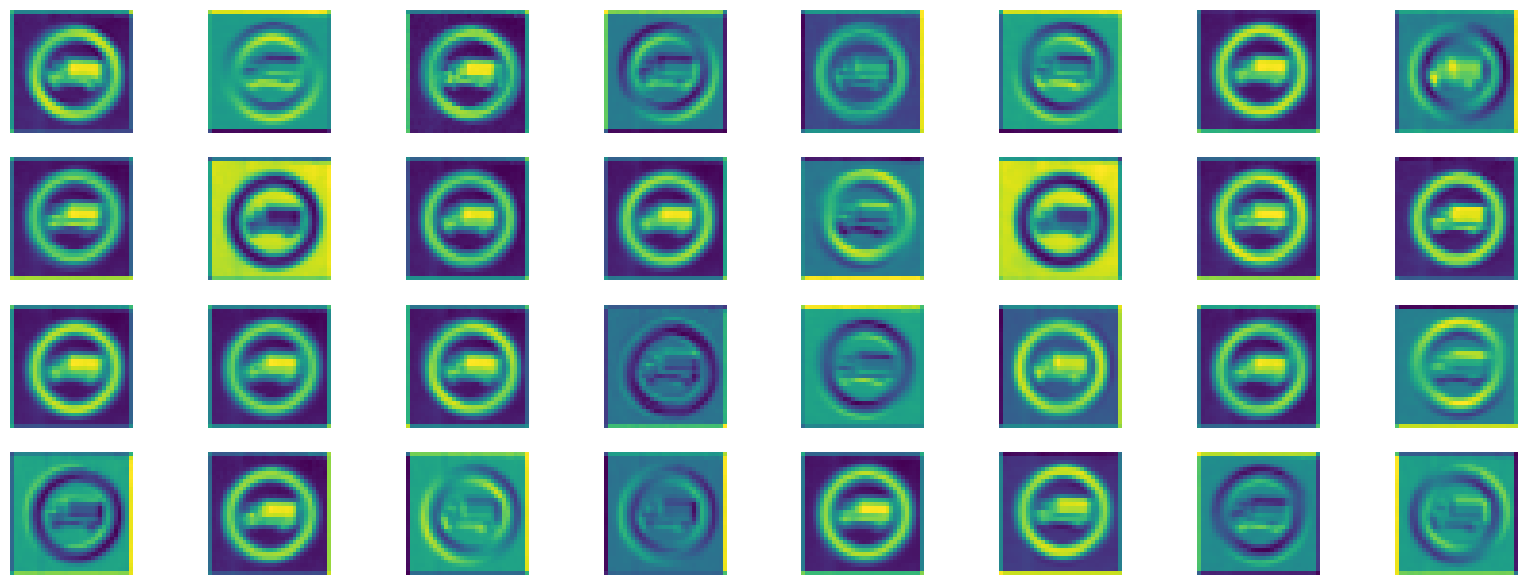

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


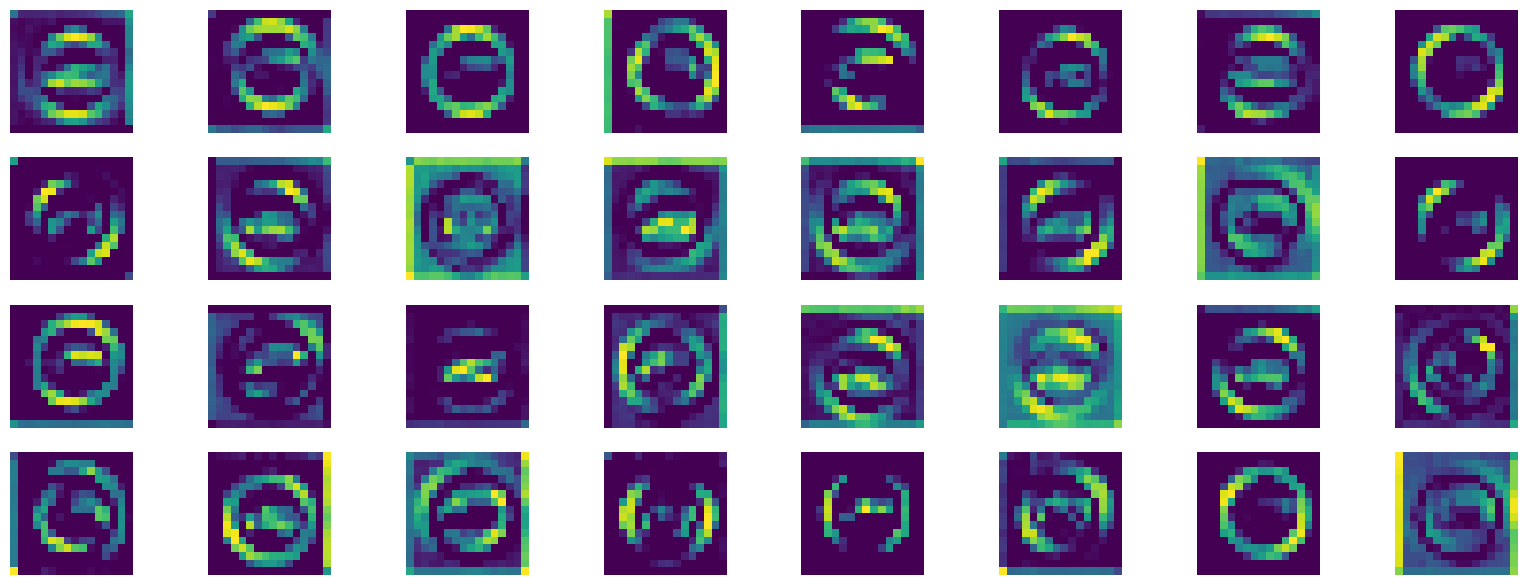

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


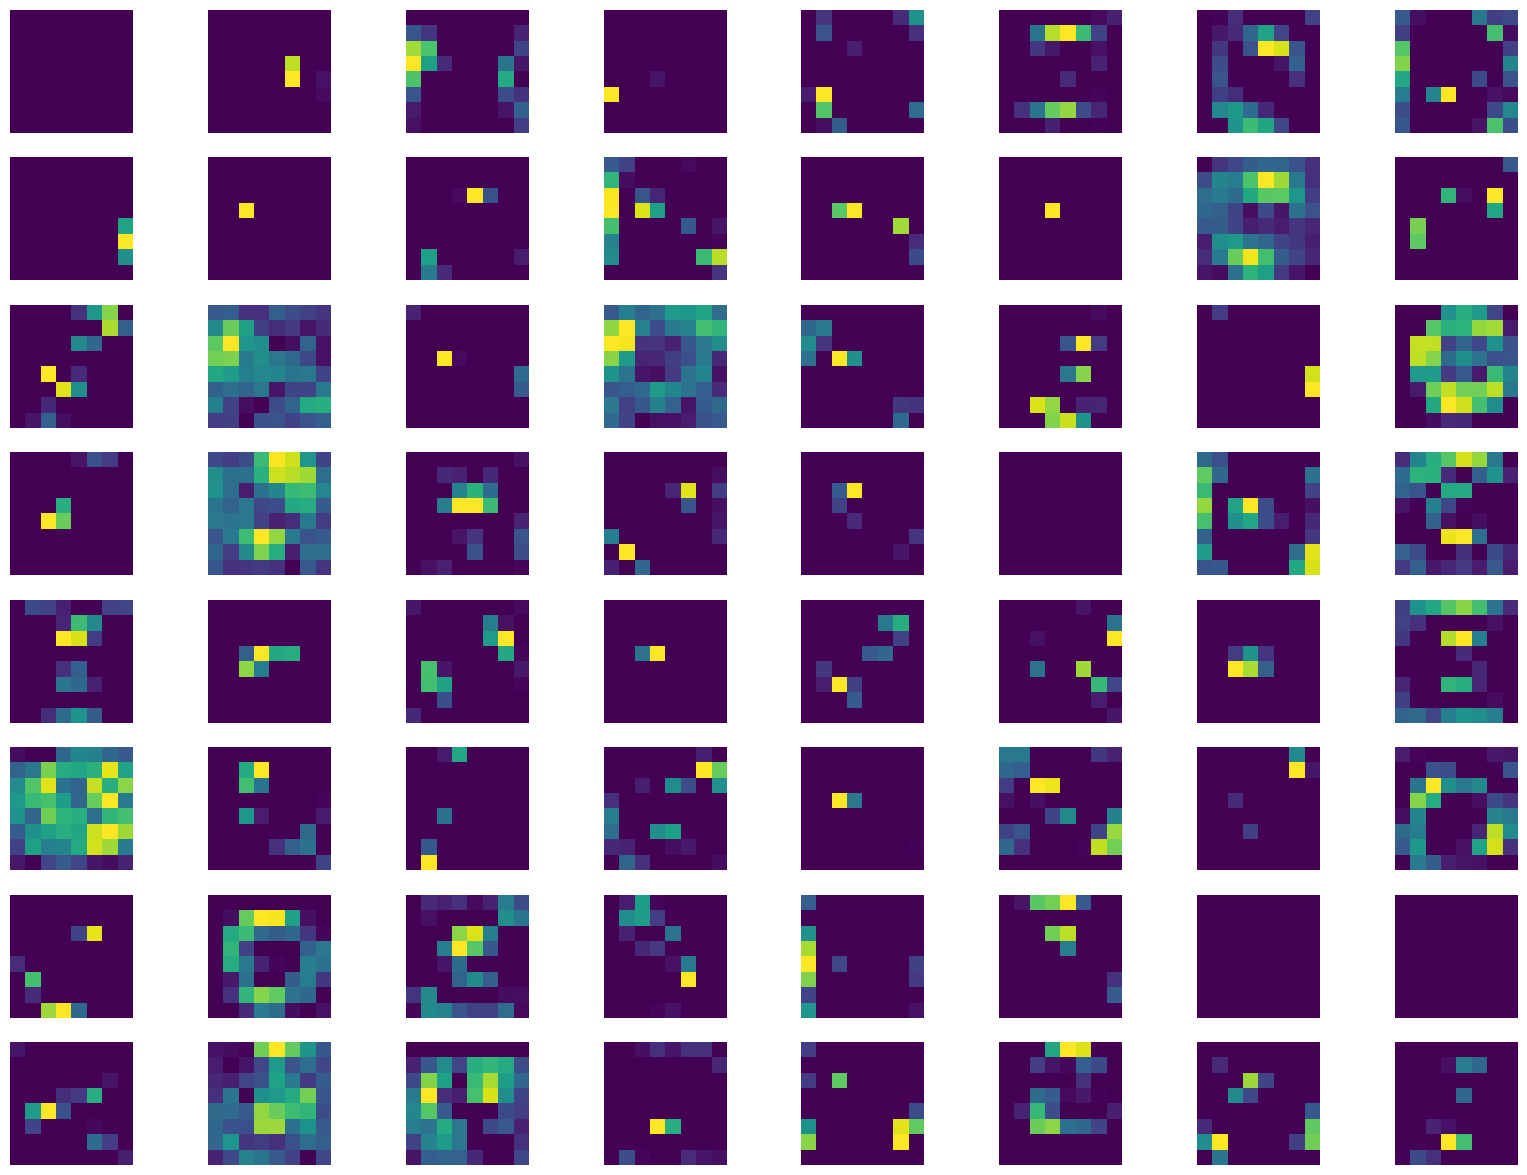

In [61]:
plot_feature_map(model , x_test[0] , 0)
plot_feature_map(model , x_test[0] , 6)
plot_feature_map(model , x_test[0] , 13)

Text(0.5, 1.0, 'Speed limit (120km/h)')

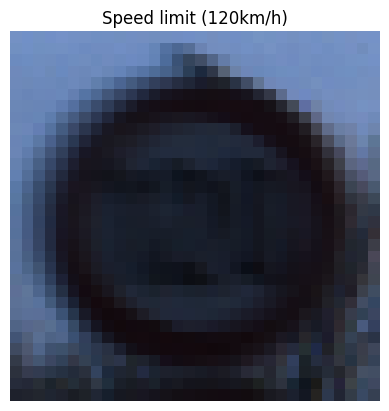

In [62]:
plt.imshow(x_test[328])
plt.axis('off')
label = f'{class_name[y_test[328]]}'
plt.title(label)

In [63]:
y_pred = model.predict(x_test[328:329])
y_pred = np.argmax(y_pred , axis = -1)
class_name[y_pred[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Speed limit (120km/h)'

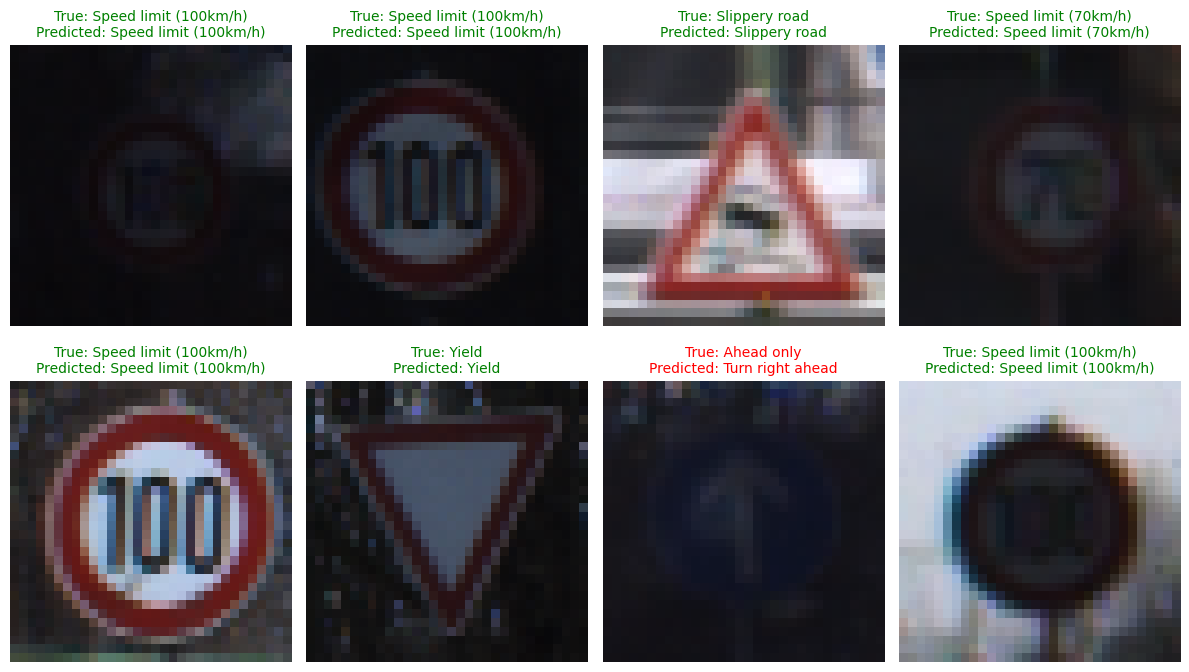

In [64]:
def check_predict (x_data , y_data , y_pred):
  fig , ax = plt.subplots(2,4 , figsize = (12,8))
  for i in range(0,2):
    for j in range (0,4):
      index = np.random.randint(0,len(x_data))
      ax[i,j].imshow(x_data[index])
      ax[i,j].axis('off')
      index_true = class_name[y_data[index]]
      index_predict = class_name[y_pred[index]]
      if(index_true == index_predict):
        color = 'green'
      else:
        color = 'red'
      true_label = f'True: {index_true}'
      predict_label = f'\nPredicted: {index_predict}'
      label = true_label + predict_label
      ax[i,j].set_title(label , color = color , fontsize = 10 )

    plt.tight_layout()

check_predict(x_test,y_test,y_pred_model)

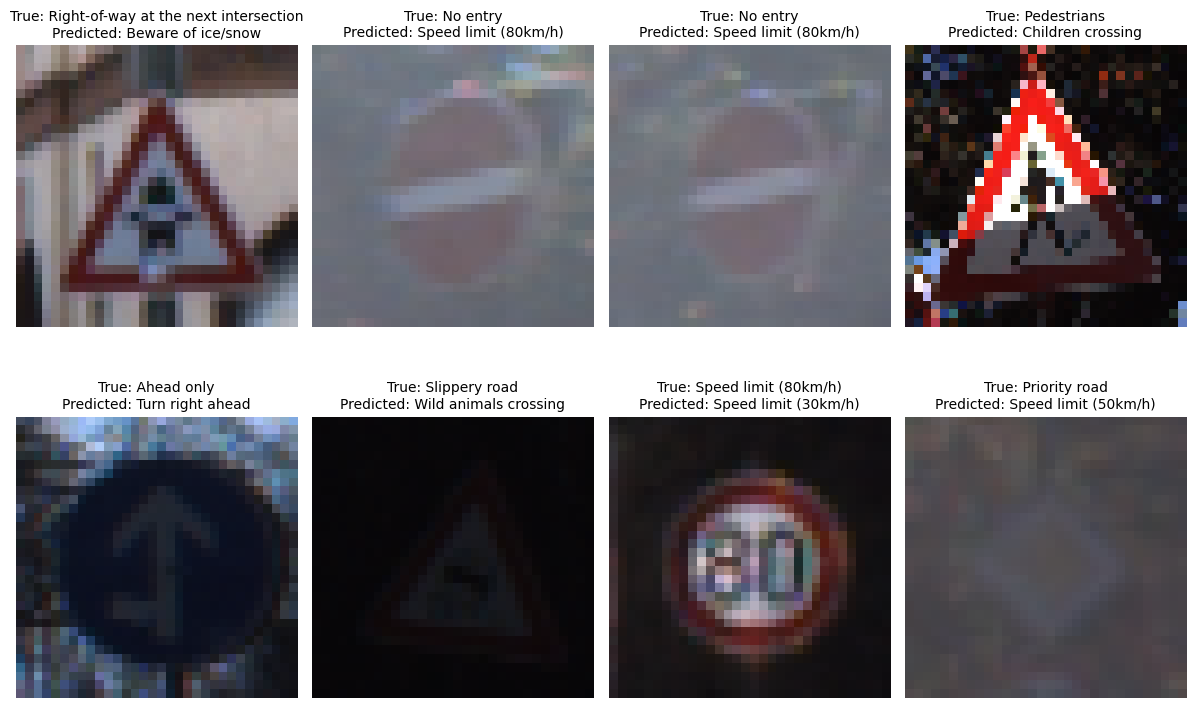

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def check_wrong_predict(model, x_data, y_data, y_pred, class_name):
    wrong_dict = {}
    for index, value in enumerate(y_pred):
        if value != y_data[index]:
            wrong_dict[index] = value

    fig, ax = plt.subplots(2, 4, figsize=(12, 8))
    wrong_indices = list(wrong_dict.keys())
    random_indices = np.random.choice(wrong_indices, size=min(8, len(wrong_indices)), replace=False)

    for i in range(2):
        for j in range(4):
            idx = random_indices[i * 4 + j]
            ax[i, j].imshow(x_data[idx])
            ax[i, j].axis('off')

            index_true = class_name[y_data[idx]]
            index_predict = class_name[y_pred[idx]]
            true_label = f'True: {index_true}'
            predict_label = f'\nPredicted: {index_predict}'
            label = true_label + predict_label
            ax[i, j].set_title(label, fontsize=10)

    plt.tight_layout()
    plt.show()
    
check_wrong_predict(model, x_test, y_test, y_pred_model, class_name)